## Different aspect of corona case visualization in India:

### India is facing huge increase of Covid-19 cases per day. Lets visualize covid-19 cases in India based on the Sample Tested and figure out how bad it is.

### Testing: Number of Sample tested is very important parameter in context of covid-19. This means that the counts of confirmed cases depend on how much a country actually tests. Without testing there is no data, but its not shown everywhere. 
#### If we include number of Sample tested into the picture and then do the visualization we can see how effective is covid-19 in India


#### I have calculated three specific factor:
* Risk percentage: Risk factor calculates effect of death risk per day based on Sample tested.  
* Survival percentage: Percentage of people surviving with respect to confirmed cases per day.  
* Percent increase: Percentage of confirmed case per Sample tested.

### Sample Cities:
* Delhi
* Mumbai
* Chennai
* Bangalore

#### Little insights of upcoming graphs:
* We can see Death risks are getting decreased over time. 
* Survival from covid-19 are getting increased.
* Increase ratio is settling.

### Feedbacks and active participation are most welcome

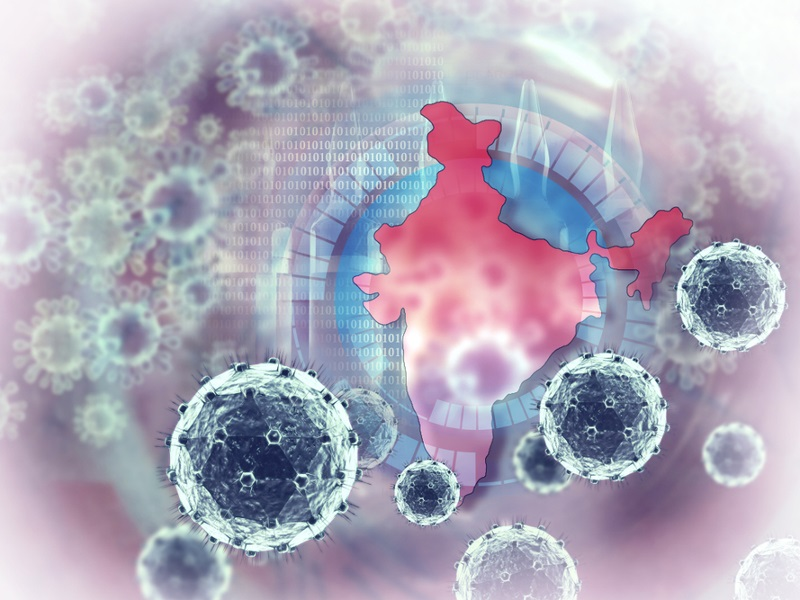

**Data source: https://github.com/covid19india/api**

**Image source: https://www.clinicaltrialsarena.com/wp-content/uploads/sites/33/2020/02/Coronavirus-in-India.jpg**

#### Notebook content:
* Data preparation and analysis
* Formula
* Graphs

Library loading

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Load and look into Dataset**

In [ ]:
df = pd.read_csv("../input/latest-data-covid19/districts_latest.csv")
df.sample(n=10, random_state=1)

**Null Value in Tested column**

In [ ]:
label = ['Null', 'Not-Null']
color = ['orange','lightgreen']
data = [df["Tested"].isna().sum(), len(df)-df["Tested"].isna().sum()]
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(data, colors = color, explode = explode, labels = label, shadow = True, autopct = '%.2f%%')
plt.title('Value count', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### We can see the column Tested has more than 50% Null values that means we dont have records for most of the district. Lets select 4 of the major Indian cities.
* Delhi
* Mumbai
* Bangalore
* Chennai

In [ ]:
df_mod = df[df["District"].isin(["Delhi", "Mumbai", "Bengaluru Urban", "Chennai"])]
df_mod = df_mod.reset_index()
df_mod['Date']= pd.to_datetime(df_mod['Date'])
df_mod = df_mod.drop(["index", "State"], axis=1)
df_mod.head()

#### Lets see the null value count in modified dataset which contain only 4 major Indian city.

In [ ]:
label = ['Null', 'Not-Null']
color = ['orange','lightgreen']
data = [df_mod["Tested"].isna().sum(), len(df_mod)-df_mod["Tested"].isna().sum()]
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(data, colors = color, explode = explode, labels = label, shadow = True, autopct = '%.2f%%')
plt.title('Null value count', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
df_mod[df_mod["Tested"].isna()].tail(2)

### It's accepted now, as we can see Null entries are till date 17/5/2020, so we can drop null values.

**Dataset after droping Null**

In [ ]:
df_mod = df_mod.dropna()
df_mod.head()

### Calculations:
#### I am trying to find the Risk factor and Survival percentage which is based on the Tested Case.

* Risk_Percentage:

     (confirmed_case - recovered + deceased + others)/(total test) * 100
 
* Survival_Percentage:

    (recovered/confirmed) * 100
    
* Percenatge_incerease:

    (confirmed/tested) * 100

In [ ]:
def risk(c,r,d,o,t):
    return ((c-r+d+o)/t)*100

def survival(c,r):
    return ((r)/c)*100

def per_increase(c,t):
    return ((c)/t)*100

In [ ]:
df_mod["Risk"] = df_mod.apply(lambda x: risk(x["Confirmed"], x["Recovered"], x["Deceased"], x["Other"], x["Tested"]), axis=1) 
df_mod["Survival"] = df_mod.apply(lambda x: survival(x["Confirmed"], x["Recovered"]),axis=1)
df_mod["Increased"] = df_mod.apply(lambda x: per_increase(x["Confirmed"], x["Tested"]),axis=1)

### The Dataset is giving information about Risk, Survival and Increase percentage from Corona virus per day.

In [ ]:
df_mod.head()

### Lets visualize both Risk and Survival percentage per city.

In [ ]:
def graph_city(city):
    #fig, axs = plt.subplots(ncols=1)
    plt.figure(figsize=(10,5))
    df = df_mod[df_mod["District"] == city]
    sns.lineplot(x="Date", y="Risk", data=df)
    plt.title('Covid-19 Risk percentage')
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.lineplot(x="Date", y="Survival", data=df)
    plt.title('Covid-19 Survival percentage')
    plt.show()
    
    plt.figure(figsize=(10,5))
    sns.lineplot(x="Date", y="Increased", data=df)
    plt.title('Covid-19 % increase in Cases')
    plt.show()

### Visualization:

There are 3 graphs, based on the Covid Test taken per day 
1. Risk % per day
2. Survival % per day
3. Increased % per day

#### we can see the results are satisfactory even without proper corona vaccine.
Risk % are decaying and Survival % are increasing.  


### Delhi

In [ ]:
graph_city("Delhi")

#### We can see in Delhi Risk % graph is getting decay and survival % is settling towads 90% also % increase is decreasing.

In [ ]:
graph_city("Bengaluru Urban")

#### Bangalore had complete lockdown till 31st June, we can see the effect from 1st july. The cases are increased, Risk % is increased and survival % is also affected. Towards end it is again coming to saturation. 

### Chennai

In [ ]:
graph_city("Chennai")

In [ ]:
graph_city("Mumbai")